In [1]:
import math
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter


Bad key text.latex.unicode in file /Users/nirweingarten/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/nirweingarten/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/nirweingarten/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.de

In [2]:
pd.options.display.float_format = "{:,.3f}".format
plt.rcParams.update({'font.size': 14})

### Visualization

In [3]:
PICKLE_DIR = os.path.join('..', 'pickles')
PICKLE_PATHS = {
    'MNIST vanilla': os.path.join(PICKLE_DIR, 'mnist_stats.pkl'),
    'FMNIST vanilla': os.path.join(PICKLE_DIR, 'fmnist_vanila_k256.pkl'),
    'FMNIST gmm k128 w2': os.path.join(PICKLE_DIR, 'fmnist_stats_gmm_k128_w2.pkl'),
    'FMNIST gmm k64 w4': os.path.join(PICKLE_DIR, 'fmnist_stats_gmm_k64_w4.pkl'),
    'FMINST 2 stochastic': os.path.join(PICKLE_DIR, 'fmnist_stats_seq_k256.pkl'),
    'FMINST 2 stochastic extended': os.path.join(PICKLE_DIR, 'fmnist_stats_seq_extened_k256.pkl')
    }
BETA = 1e-3

In [4]:
model_stats = {}
for key in PICKLE_PATHS:
    with open(PICKLE_PATHS[key], 'rb') as f:
        model_stats[key] = pickle.load(f)

In [5]:
DF_COLS = ['error', 'accuracy', 'I(Z;X)', 'I(Z;Y)', 'num params', 'best epoch']
IDX = list(model_stats.keys())
df = pd.DataFrame(index=IDX, columns=DF_COLS)
for key in model_stats:
    best_epoch = np.argmin(model_stats[key]['test_error'])
    df.loc[key]['error'] = model_stats[key]['test_error'][best_epoch]
    df.loc[key]['accuracy'] = model_stats[key]['test_acc'][best_epoch]
    df.loc[key]['I(Z;X)'] = model_stats[key]['test_izx'][best_epoch]
    df.loc[key]['I(Z;Y)'] = model_stats[key]['test_izy'][best_epoch]
    df.loc[key]['best epoch'] = best_epoch
    if 'num_params' in model_stats[key].keys():
        df.loc[key]['num params'] = model_stats[key]['num_params']
    else:
        df.loc[key]['num params'] = np.nan

In [6]:
df

,error,accuracy,I(Z;X),I(Z;Y),num params,best epoch
MNIST vanilla,0.02,0.98,27.245,3.191,NaN,118
FMNIST vanilla,0.103,0.897,40.162,2.469,2380810,95
FMNIST gmm k128 w2,0.102,0.898,40.434,2.209,2379532,192
FMNIST gmm k64 w4,0.102,0.898,43.532,2.34,2378894,64
FMINST 2 stochastic,0.1,0.9,845.333,2.516,2379530,136
FMINST 2 stochastic extended,0.105,0.895,255.735,2.571,2512394,68


<AxesSubplot:title={'center':'number of parameters per model'}>

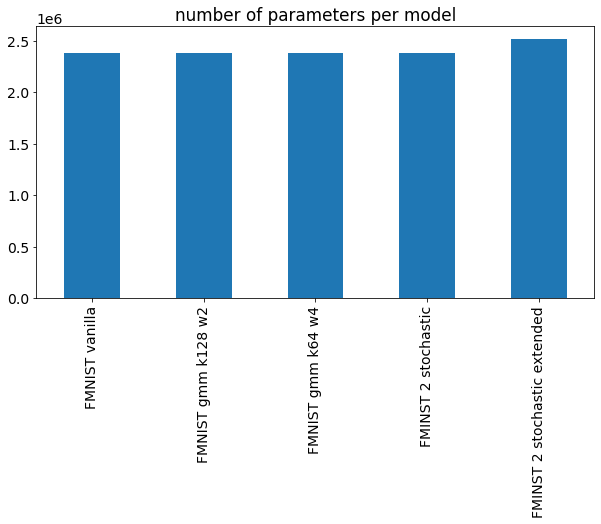

In [7]:
df['num params'][1:].plot(kind='bar', figsize=(10,5),
                          fontsize=14, title='number of parameters per model')
plt.show()

In [8]:
_ = model_stats.pop('MNIST vanilla')

Text(0.5, 0.98, 'Test loss per epoch')

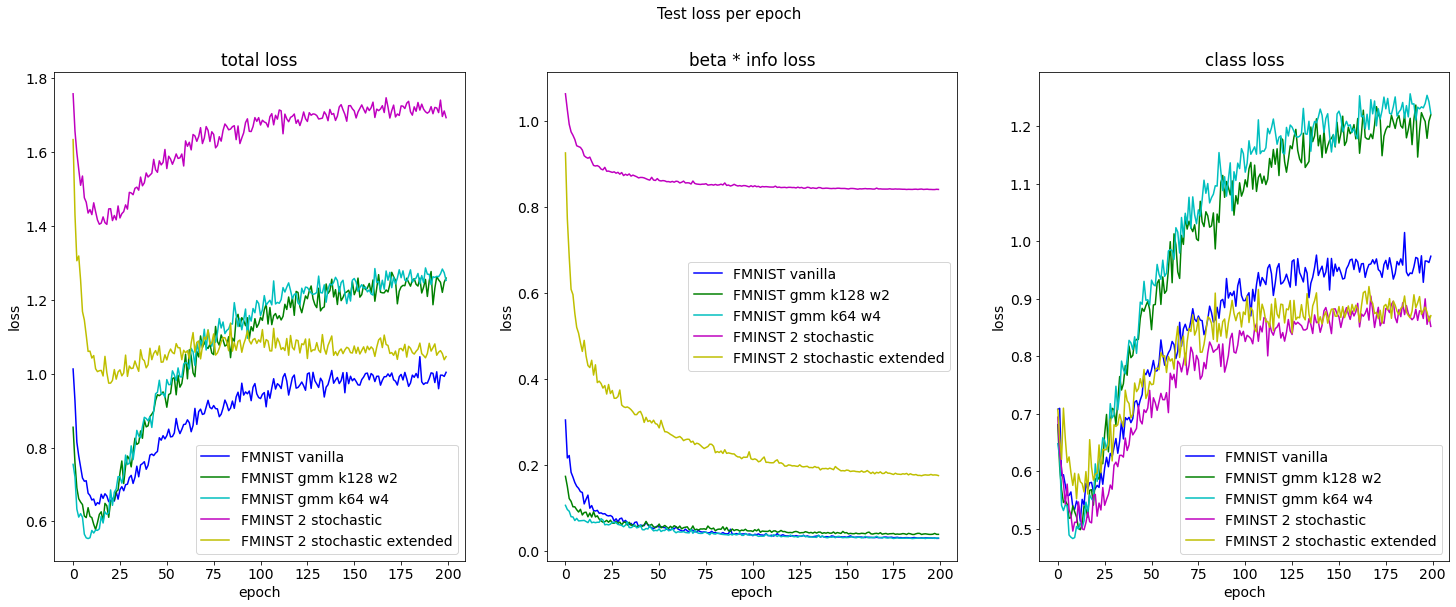

In [9]:
COLORS = ['b', 'g', 'c', 'm', 'y', 'k']

fig, axes = plt.subplots(1, 3, figsize=(25, 9))
fig.suptitle('Test loss per epoch', fontsize=15)

for i, key in enumerate(model_stats):
    _ = axes[0].plot(model_stats[key]['test_total_loss'], color=COLORS[i])
    _ = axes[1].plot(BETA * np.array(model_stats[key]['test_info_loss']), color=COLORS[i])
    _ = axes[2].plot(model_stats[key]['test_class_loss'], color=COLORS[i])

_ = axes[0].set_title('total loss')
_ = axes[1].set_title('beta * info loss')
_ = axes[2].set_title('class loss')

for i in range(3):
    _ = axes[i].set_xlabel('epoch')
    _ = axes[i].set_ylabel('loss')
    _ = axes[i].legend(list(model_stats.keys()))

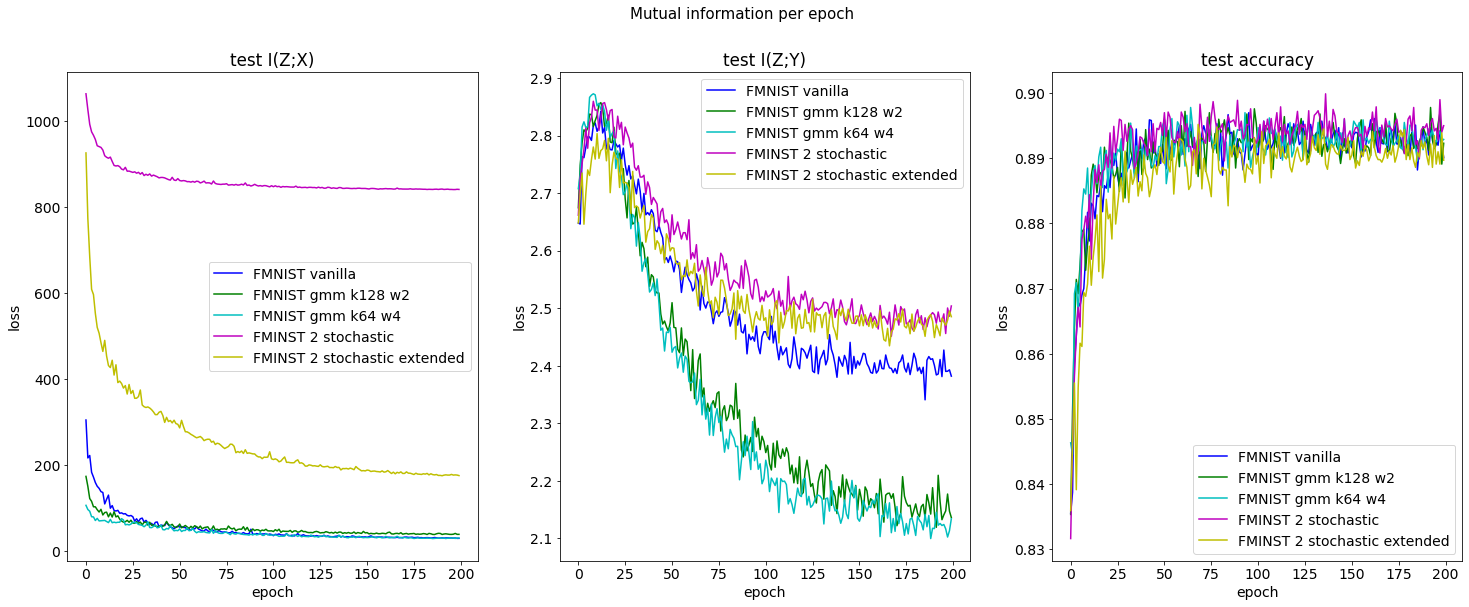

In [11]:
COLORS = ['b', 'g', 'c', 'm', 'y', 'k']

fig, axes = plt.subplots(1, 3, figsize=(25, 9))
fig.suptitle('Mutual information per epoch', fontsize=15)

for i, key in enumerate(model_stats):
    _ = axes[0].plot(model_stats[key]['test_izx'], color=COLORS[i])
    _ = axes[1].plot(model_stats[key]['test_izy'], color=COLORS[i])
    _ = axes[2].plot(model_stats[key]['test_acc'], color=COLORS[i])

_ = axes[0].set_title('test I(Z;X)')
_ = axes[1].set_title('test I(Z;Y)')
_ = axes[2].set_title('test accuracy')

for i in range(3):
    _ = axes[i].set_xlabel('epoch')
    _ = axes[i].set_ylabel('loss')
    _ = axes[i].legend(list(model_stats.keys()))

In [14]:
model_stats.keys()

dict_keys(['FMNIST vanilla', 'FMNIST gmm k128 w2', 'FMNIST gmm k64 w4', 'FMINST 2 stochastic', 'FMINST 2 stochastic extended'])

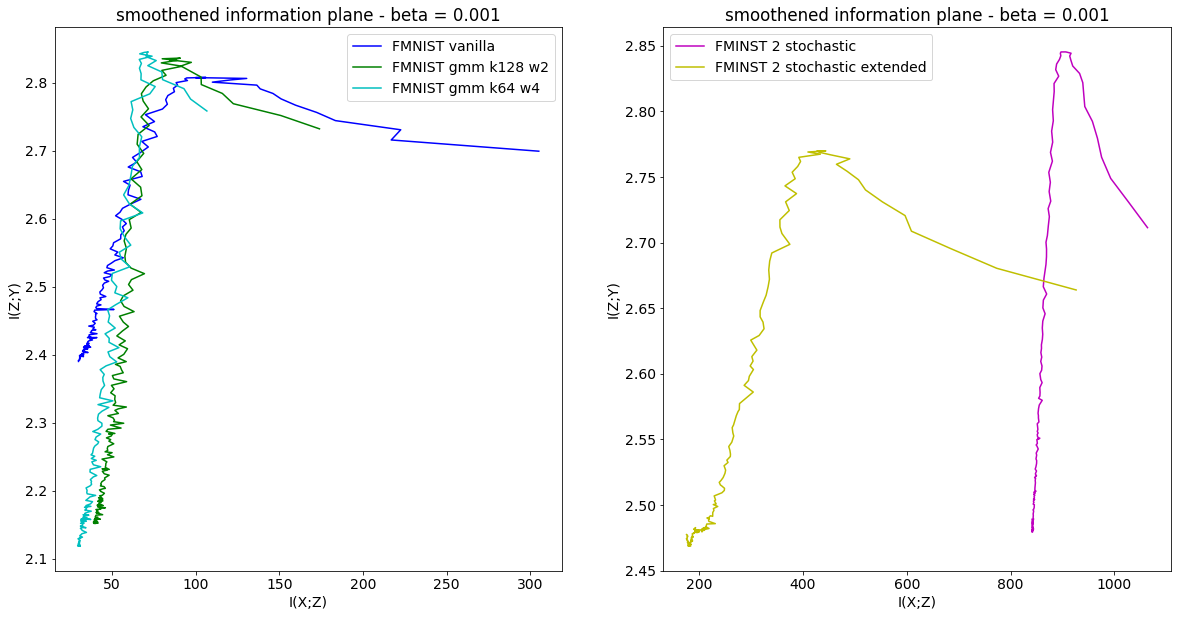

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, key in enumerate(model_stats):
    y_hat = savgol_filter(model_stats[key]['test_izy'], 51, 3) # window size 51, polynomial order 3
    if 'stoch' in key:
        _ = axes[1].plot(model_stats[key]['test_izx'], y_hat, color=COLORS[i])
    else:
        _ = axes[0].plot(model_stats[key]['test_izx'], y_hat, color=COLORS[i])
_ = axes[0].set_title('smoothened information plane - beta = {}'.format(BETA))
_ = axes[1].set_title('smoothened information plane - beta = {}'.format(BETA))
_ = axes[0].set_xlabel('I(X;Z)')
_ = axes[0].set_ylabel('I(Z;Y)')
_ = axes[1].set_xlabel('I(X;Z)')
_ = axes[1].set_ylabel('I(Z;Y)')
_ = axes[0].legend(['FMNIST vanilla', 'FMNIST gmm k128 w2', 'FMNIST gmm k64 w4'])
_ = axes[1].legend(['FMINST 2 stochastic', 'FMINST 2 stochastic extended'])

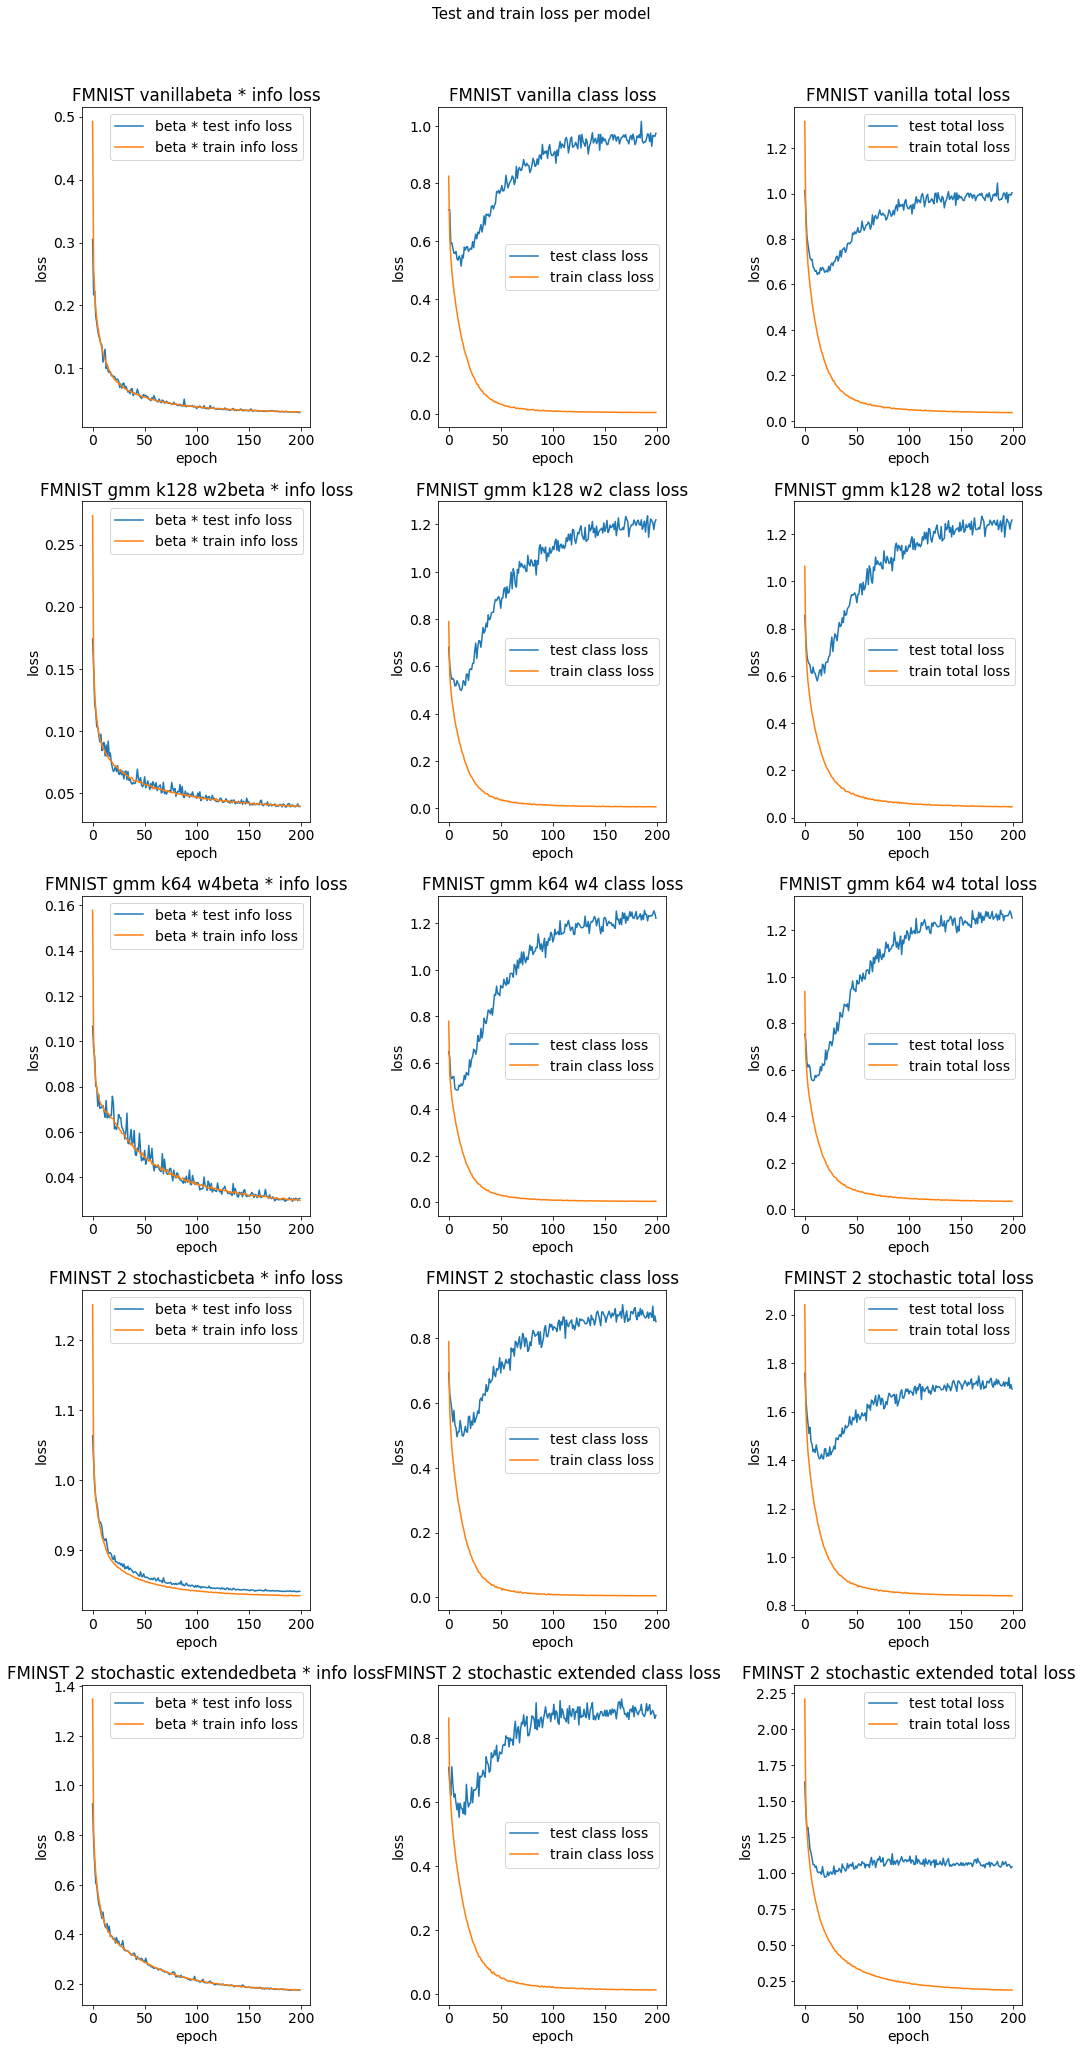

In [9]:
num_models = len(model_stats.keys())
fig, axes = plt.subplots(num_models, 3, figsize=(15, 30))
fig.suptitle('Test and train loss per model', fontsize=15)

for i, key in enumerate(model_stats):
    if key == 'MNIST vanilla':
        continue
    _ = axes[i][0].plot(BETA * np.array(model_stats[key]['test_info_loss']))
    _ = axes[i][0].plot(BETA * np.array(model_stats[key]['train_info_loss']))
    _ = axes[i][0].set_title(key + 'beta * info loss')
    _ = axes[i][0].legend(['beta * test info loss', 'beta * train info loss'])
    _ = axes[i][1].plot(model_stats[key]['test_class_loss'])
    _ = axes[i][1].plot(model_stats[key]['train_class_loss'])
    _ = axes[i][1].set_title(key + ' class loss')
    _ = axes[i][1].legend(['test class loss', 'train class loss'])
    _ = axes[i][2].plot(model_stats[key]['test_total_loss'])
    _ = axes[i][2].plot(model_stats[key]['train_total_loss'])
    _ = axes[i][2].set_title(key + ' total loss')
    _ = axes[i][2].legend(['test total loss', 'train total loss'])

for i in range(len(model_stats)):
    for q in range(3):
        _ = axes[i][q].set_xlabel('epoch')
        _ = axes[i][q].set_ylabel('loss')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])